# Library import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.utils import resample
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",50)

# Read dataset

In [3]:
df = pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Missing value analysis

In [4]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [6]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [7]:
df.dropna(inplace=True,axis=0)

#### Above we can see gender, dependents, occupation, city, customer_nw_category, days_since_last_transaction have missing values 

In [8]:
df.dropna(subset=['gender'],inplace=True,axis=0)

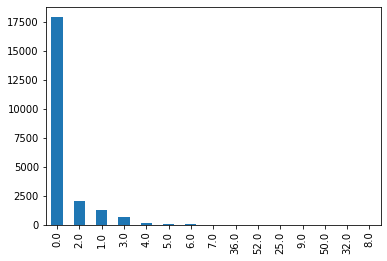

In [9]:
pd.value_counts(df['dependents']).plot(kind='bar')
plt.show()

### From the above bar plot we can see maximum number of values of dependents feature is 0. So we will replace missing value of dependent variable with 0

In [10]:
df['dependents'].fillna(0,inplace=True)

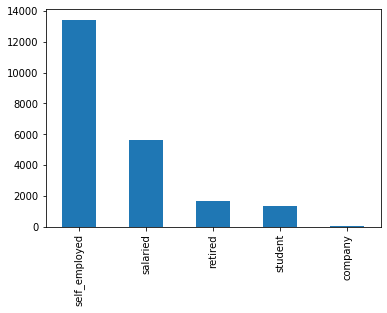

In [11]:
pd.value_counts(df['occupation']).plot(kind='bar')
plt.show()

### From the above bar plot we can see maximum number of values of occupation feature is self_employed. So we will replace missing value of dependent variable with self_employed

In [12]:
df['occupation'].fillna('self_employeed',inplace=True)

### In city feature we will replace missing value with median value

In [13]:
df['city'].fillna(df['city'].median(),inplace=True)

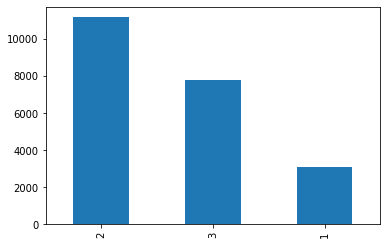

In [14]:
pd.value_counts(df['customer_nw_category']).plot(kind='bar')
plt.show()

### From the above bar plot we can see maximum number of values of customer_nw_category feature is 2. So we will replace missing value of customer_nw_category variable with 2

In [15]:
df['customer_nw_category'].fillna(2,inplace=True)

In [16]:
df['days_since_last_transaction'].head()

0    224.0
4     58.0
5     60.0
6     98.0
7    172.0
Name: days_since_last_transaction, dtype: float64

In [17]:
df['current_month_credit'].head()

0    0.20
4    0.33
5    0.36
6    0.64
7    0.27
Name: current_month_credit, dtype: float64

In [18]:
df['current_month_debit'].head()

0       0.20
4     588.62
5     857.50
6    1299.64
7     443.13
Name: current_month_debit, dtype: float64

In [19]:
df[df['days_since_last_transaction']==np.nan]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn


In [20]:
df['days_since_last_transaction']

0        224.0
4         58.0
5         60.0
6         98.0
7        172.0
         ...  
28375     57.0
28377     70.0
28378     14.0
28379      0.0
28381     59.0
Name: days_since_last_transaction, Length: 22067, dtype: float64

In [21]:
df[df['days_since_last_transaction'].isnull()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn


In [22]:
pd.value_counts(df['days_since_last_transaction'])

0.0      1541
3.0       777
14.0      595
4.0       577
6.0       528
         ... 
309.0       1
92.0        1
170.0       1
288.0       1
134.0       1
Name: days_since_last_transaction, Length: 357, dtype: int64

### From the above data we can see maximum number of values of days_since_last_transaction feature is 0. So we will replace missing value of days_since_last_transaction variable with 0

In [23]:
df['days_since_last_transaction'].fillna(0,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  object 
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  object 
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [25]:
df.reset_index(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           22067 non-null  int64  
 1   customer_id                     22067 non-null  int64  
 2   vintage                         22067 non-null  int64  
 3   age                             22067 non-null  int64  
 4   gender                          22067 non-null  object 
 5   dependents                      22067 non-null  float64
 6   occupation                      22067 non-null  object 
 7   city                            22067 non-null  float64
 8   customer_nw_category            22067 non-null  int64  
 9   branch_code                     22067 non-null  int64  
 10  days_since_last_transaction     22067 non-null  float64
 11  current_balance                 22067 non-null  float64
 12  previous_month_end_balance      

In [27]:
df.describe()

,index,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000
mean,14163.981783,15115.161372,2547.069334,47.931345,0.377487,800.318575,2.211991,874.440975,66.934790,7.132589e+03,7.222013e+03,7.181977e+03,6694.966494,3.943065e+03,3.781366e+03,4.070565e+03,3.720333e+03,7.165418e+03,7.182148e+03,0.193683
std,8184.834214,8737.384035,1598.675520,16.393352,1.044629,431.454448,0.669556,904.244526,84.133427,2.026846e+04,2.105071e+04,1.927121e+04,17101.802052,8.661750e+04,3.254151e+04,5.726446e+04,2.517514e+04,1.959007e+04,2.097682e+04,0.395192
min,0.000000,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7060.500000,7522.500000,1321.000000,36.000000,0.000000,409.000000,2.000000,159.000000,11.000000,1.784445e+03,1.906485e+03,2.209835e+03,1817.980000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029970e+03,2.090665e+03,0.000000
50%,14163.000000,15120.000000,2202.000000,46.000000,0.000000,848.000000,2.000000,531.000000,28.000000,3.335440e+03,3.426740e+03,3.592880e+03,3380.690000,1.130000e+00,6.440000e+00,2.147300e+02,2.285000e+02,3.501740e+03,3.508160e+03,0.000000
75%,21265.500000,22685.500000,3370.000000,60.000000,0.000000,1096.000000,3.000000,1374.000000,90.000000,6.801310e+03,6.826095e+03,6.819235e+03,6628.750000,9.937800e+02,1.129115e+03,1.579220e+03,1.643175e+03,6.858385e+03,6.779355e+03,0.000000
max,28381.000000,30301.000000,11353.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,1.076091e+06,1.001124e+06,1.192704e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.074625e+06,1.326487e+06,1.000000


## One hot encoding

In [29]:
enc = OneHotEncoder(handle_unknown='error',sparse=False,drop='first')
new_features = pd.DataFrame(enc.fit_transform(df[['gender','occupation']]),columns=enc.get_feature_names())


In [30]:
new_df=df.join(new_features)

In [31]:
new_df.drop(['index','customer_id','gender','occupation'],axis=1,inplace=True)

In [87]:
categorical_feature = [col for col in df.columns if len(df[col].unique())<25 and col!='churn']
continuous_features = [col for col in df.columns if col not in categorical_feature and col!='churn']

In [88]:
categorical_feature

['gender', 'dependents', 'occupation', 'customer_nw_category']

## Countplot of each categorical feature with respect to churn feature

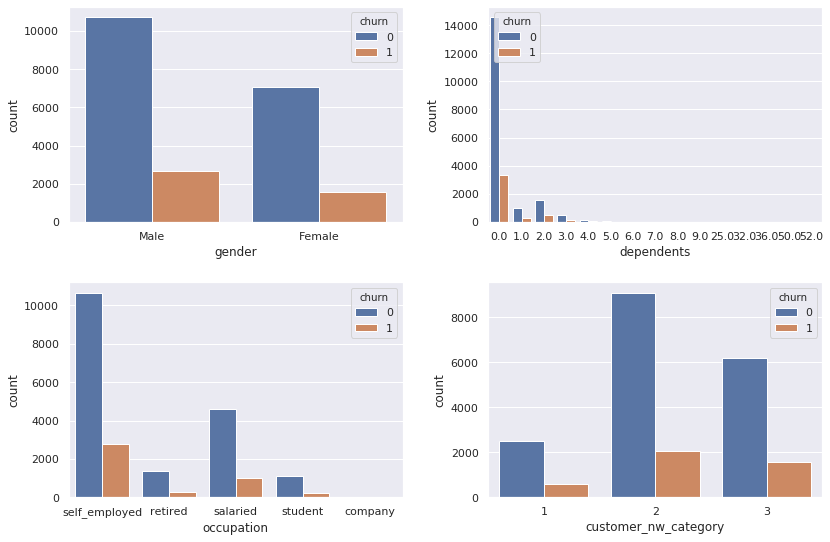

In [106]:
plt.figure(figsize=(12,8))
for i in enumerate(categorical_feature):
    plt.subplot(2,2,i[0]+1)
    sns.countplot(i[1],hue='churn',data=df)
    plt.tight_layout(pad=2)

## Outlier detection for continuous features

Skew =  0.7986761870370633


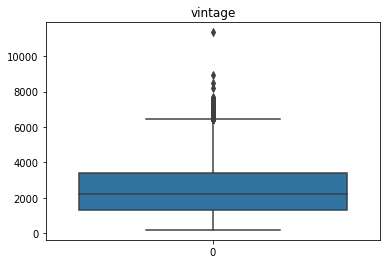

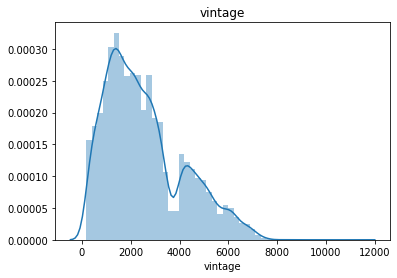

In [35]:
print("Skew = ",new_df[continuous_features[0]].skew())
sns.boxplot(data=new_df[continuous_features[0]])
plt.title(continuous_features[0])
plt.show()

sns.distplot(new_df[continuous_features[0]],bins=50)
plt.title(continuous_features[0])
plt.show()

## In vintage feature we can see there are some outlier.i am asuming here that the values which are > 90 percentile is a outlier. So we will replace outliers using median values.

Outlier= 4989.0	Median= 2202.0
After removing outlier skew is = 0.526741513793479


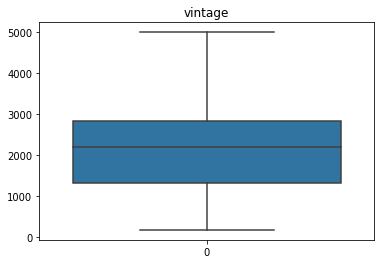

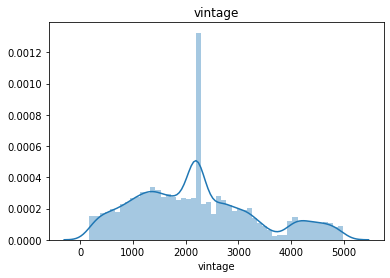

In [36]:
outlier=new_df[continuous_features[0]].quantile(0.90)
median=new_df[continuous_features[0]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[0]] = np.where(new_df[continuous_features[0]]>outlier,median,new_df[continuous_features[0]])
print(f'After removing outlier skew is = {new_df[continuous_features[0]].skew()}')
sns.boxplot(data=new_df[continuous_features[0]])
plt.title(continuous_features[0])
plt.show()

sns.distplot(new_df[continuous_features[0]],bins=50)
plt.title(continuous_features[0])
plt.show()

Skew =  0.30709589335282683


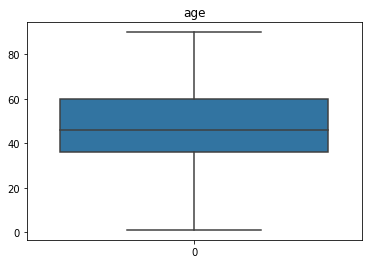

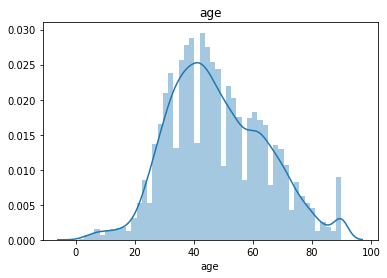

In [37]:
print("Skew = ",new_df[continuous_features[1]].skew())
sns.boxplot(data=new_df[continuous_features[1]])
plt.title(continuous_features[1])
plt.show()

sns.distplot(new_df[continuous_features[1]],bins=50)
plt.title(continuous_features[1])
plt.show()

## From the above diagram we can see that there are no outliers in age feature

Skew =  -0.09951067207951939


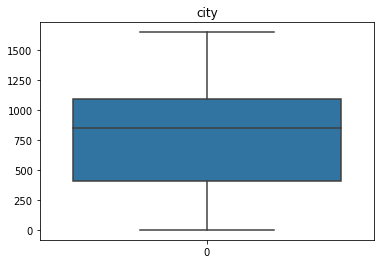

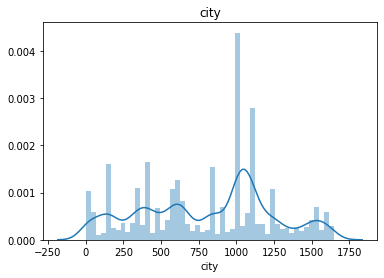

In [38]:
print("Skew = ",new_df[continuous_features[2]].skew())
sns.boxplot(data=new_df[continuous_features[2]])
plt.title(continuous_features[2])
plt.show()

sns.distplot(new_df[continuous_features[2]],bins=50)
plt.title(continuous_features[2])
plt.show()

## From the above diagram we can see that there are no outliers in city feature

Skew =  1.7217673979470982


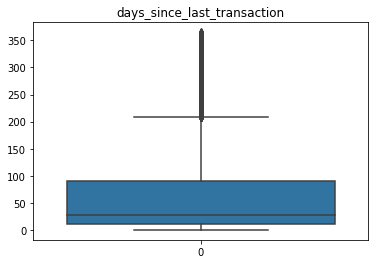

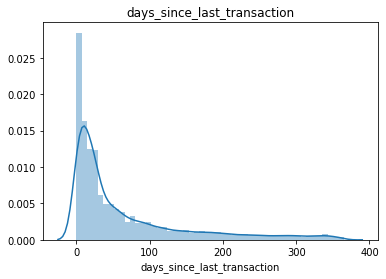

In [39]:
print("Skew = ",new_df[continuous_features[4]].skew())
sns.boxplot(data=new_df[continuous_features[4]])
plt.title(continuous_features[4])
plt.show()

sns.distplot(new_df[continuous_features[4]],bins=50)
plt.title(continuous_features[4])
plt.show()

## from the above plot we can see that there are lots of values in the days_since_last_transaction which are greater than 100.which indicates that there are lots of customer who made last transaction more than 100 days ago.I am considering that this are outliers.so we will replace > 80 percentile value with median value as 80 percentile is 115

Outlier= 115.0	Median= 28.0
After removing outlier skew is = 1.3147977520013066


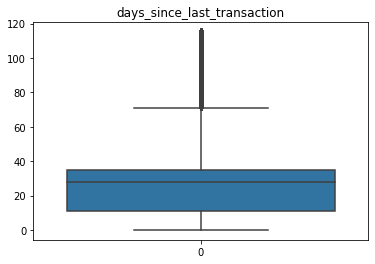

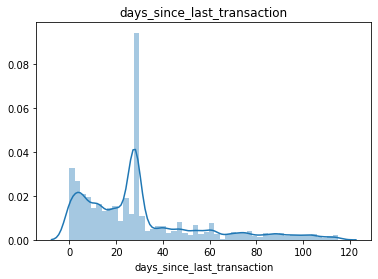

In [40]:
outlier=new_df[continuous_features[4]].quantile(0.80)
median=new_df[continuous_features[4]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[4]] = np.where(new_df[continuous_features[4]]>outlier,median,new_df[continuous_features[4]])
print(f'After removing outlier skew is = {new_df[continuous_features[4]].skew()}')
sns.boxplot(data=new_df[continuous_features[4]])
plt.title(continuous_features[4])
plt.show()

sns.distplot(new_df[continuous_features[4]],bins=50)
plt.title(continuous_features[4])
plt.show()

Skew =  22.721691386582588


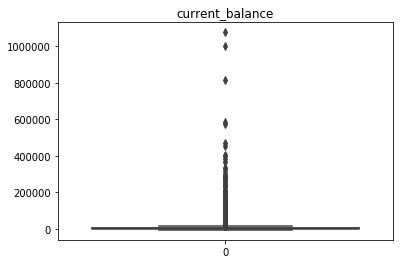

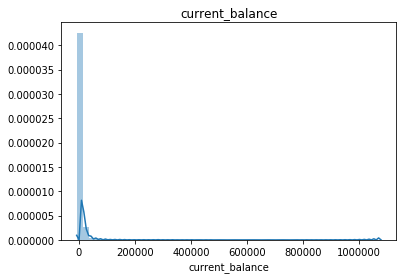

In [41]:
print("Skew = ",new_df[continuous_features[5]].skew())
sns.boxplot(data=new_df[continuous_features[5]])
plt.title(continuous_features[5])
plt.show()

sns.distplot(new_df[continuous_features[5]],bins=50)
plt.title(continuous_features[5])
plt.show()

## From the above data we can see there are some values which are <0 and there are some values which are very large.we will consider that values as outliers.we will replace the values which are <0 with 0 and the values which are >90 percentile with median value

Outlier= 13967.512	Median= 3335.44
After removing outlier skew is = 1.279431013997891


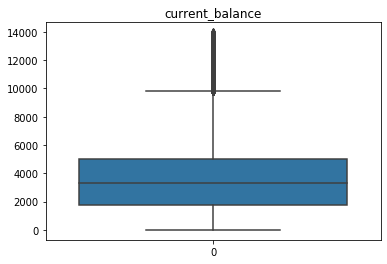

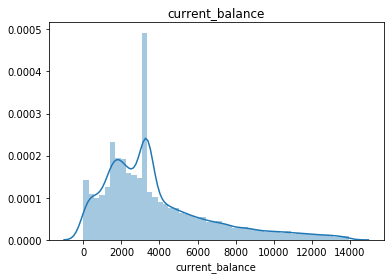

In [42]:
outlier=new_df[continuous_features[5]].quantile(0.90)
median=new_df[continuous_features[5]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[5]] = np.where(new_df[continuous_features[5]]<0,0,new_df[continuous_features[5]])
new_df[continuous_features[5]] = np.where(new_df[continuous_features[5]]>outlier,median,new_df[continuous_features[5]])
print(f'After removing outlier skew is = {new_df[continuous_features[5]].skew()}')
sns.boxplot(data=new_df[continuous_features[5]])
plt.title(continuous_features[5])
plt.show()

sns.distplot(new_df[continuous_features[5]],bins=50)
plt.title(continuous_features[5])
plt.show()

Skew =  24.234403980083435


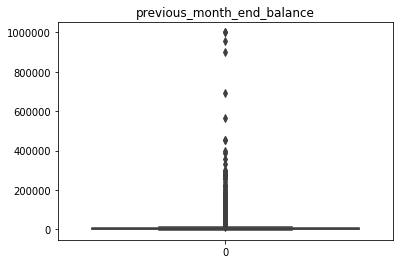

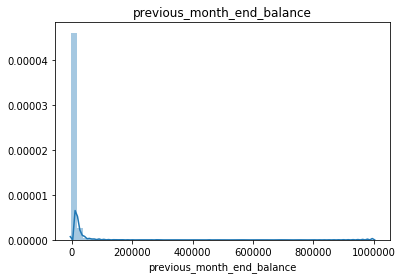

In [43]:
print("Skew = ",new_df[continuous_features[6]].skew())
sns.boxplot(data=new_df[continuous_features[6]])
plt.title(continuous_features[6])
plt.show()

sns.distplot(new_df[continuous_features[6]],bins=50)
plt.title(continuous_features[6])
plt.show()

In [44]:
new_df[continuous_features[6]].describe()

count    2.206700e+04
mean     7.222013e+03
std      2.105071e+04
min     -3.145380e+03
25%      1.906485e+03
50%      3.426740e+03
75%      6.826095e+03
max      1.001124e+06
Name: previous_month_end_balance, dtype: float64

## From the above data we can see there are some values which are <0 and there are some values which are very large.we will consider that values as outliers.we will replace the values which are <0 with 0 and the values which are >90 percentile with median value

Outlier= 13779.924000000006	Median= 3426.74
After removing outlier skew is = 1.2811273214423209


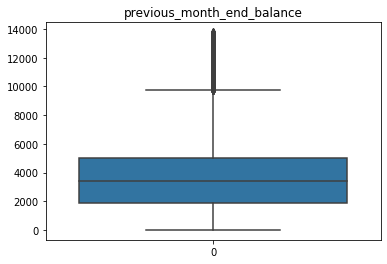

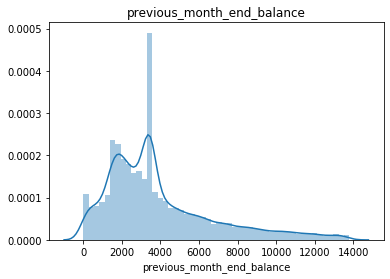

In [45]:
outlier=new_df[continuous_features[6]].quantile(0.90)
median=new_df[continuous_features[6]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[6]] = np.where(new_df[continuous_features[6]]<0,0,new_df[continuous_features[6]])
new_df[continuous_features[6]] = np.where(new_df[continuous_features[6]]>outlier,median,new_df[continuous_features[6]])
print(f'After removing outlier skew is = {new_df[continuous_features[6]].skew()}')
sns.boxplot(data=new_df[continuous_features[6]])
plt.title(continuous_features[6])
plt.show()

sns.distplot(new_df[continuous_features[6]],bins=50)
plt.title(continuous_features[6])
plt.show()

Skew =  27.614785425588185


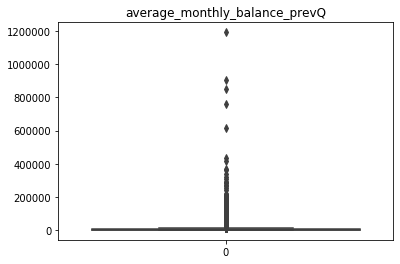

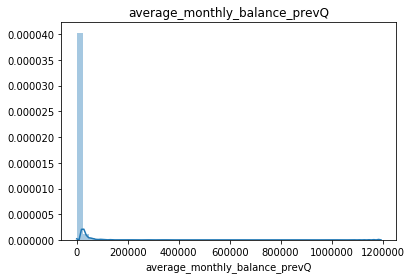

In [46]:
print("Skew = ",new_df[continuous_features[7]].skew())
sns.boxplot(data=new_df[continuous_features[7]])
plt.title(continuous_features[7])
plt.show()

sns.distplot(new_df[continuous_features[7]],bins=50)
plt.title(continuous_features[7])
plt.show()

In [47]:
new_df[continuous_features[7]].describe()

count    2.206700e+04
mean     7.181977e+03
std      1.927121e+04
min      1.428690e+03
25%      2.209835e+03
50%      3.592880e+03
75%      6.819235e+03
max      1.192704e+06
Name: average_monthly_balance_prevQ, dtype: float64

## From the above data we can see  there are some values which are very large.we will consider that values as outliers.we will replace the values which  are >90 percentile with median value

Outlier= 13266.246000000005	Median= 3592.88
After removing outlier skew is = 1.4374912577851735


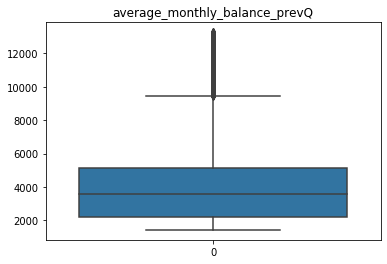

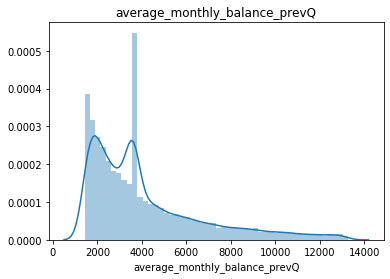

In [48]:
outlier=new_df[continuous_features[7]].quantile(0.90)
median=new_df[continuous_features[7]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[7]] = np.where(new_df[continuous_features[7]]>outlier,median,new_df[continuous_features[7]])
print(f'After removing outlier skew is = {new_df[continuous_features[7]].skew()}')
sns.boxplot(data=new_df[continuous_features[7]])
plt.title(continuous_features[7])
plt.show()

sns.distplot(new_df[continuous_features[7]],bins=50)
plt.title(continuous_features[7])
plt.show()

Skew =  21.323789143205683


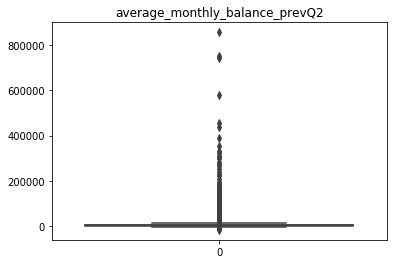

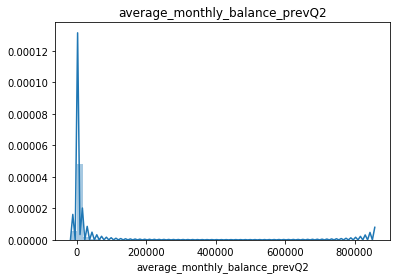

In [49]:
print("Skew = ",new_df[continuous_features[8]].skew())
sns.boxplot(data=new_df[continuous_features[8]])
plt.title(continuous_features[8])
plt.show()

sns.distplot(new_df[continuous_features[8]],bins=50)
plt.title(continuous_features[8])
plt.show()

## From the above data we can see there are some values which are <0 and there are some values which are very large.we will consider that values as outliers.we will replace the values which are <0 with 0 and the values which are >90 percentile with median value

Outlier= 12893.11600000001	Median= 3380.69
After removing outlier skew is = 1.2137404077322806


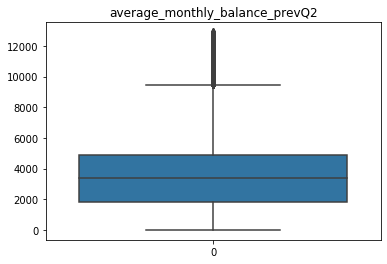

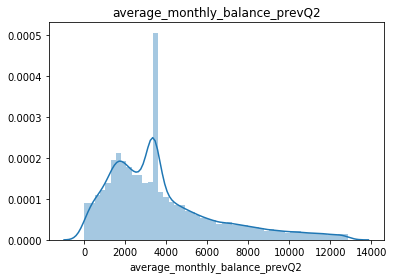

In [50]:
outlier=new_df[continuous_features[8]].quantile(0.90)
median=new_df[continuous_features[8]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[8]] = np.where(new_df[continuous_features[8]]<0,0,new_df[continuous_features[8]])
new_df[continuous_features[8]] = np.where(new_df[continuous_features[8]]>outlier,median,new_df[continuous_features[8]])
print(f'After removing outlier skew is = {new_df[continuous_features[8]].skew()}')
sns.boxplot(data=new_df[continuous_features[8]])
plt.title(continuous_features[8])
plt.show()

sns.distplot(new_df[continuous_features[8]],bins=50)
plt.title(continuous_features[8])
plt.show()

Skew =  129.68757487691394


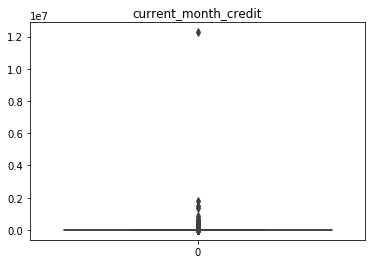

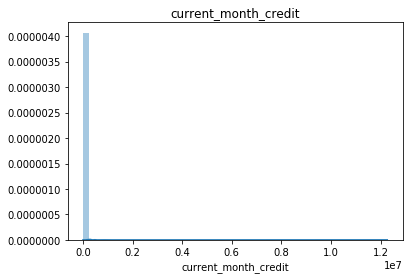

In [51]:
print("Skew = ",new_df[continuous_features[9]].skew())
sns.boxplot(data=new_df[continuous_features[9]])
plt.title(continuous_features[9])
plt.show()

sns.distplot(new_df[continuous_features[9]],bins=50)
plt.title(continuous_features[9])
plt.show()

## From the above data we can see  there are some values which are very large.we will consider that values as outliers.we will replace the values which  are >90 percentile with median value

Outlier= 4909.726000000001	Median= 1.13
After removing outlier skew is = 2.6693573782111564


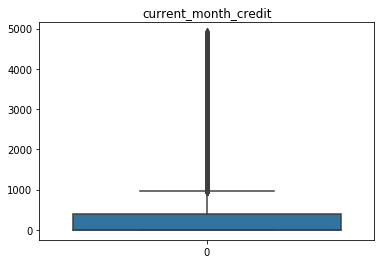

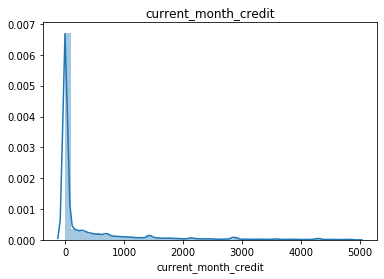

In [52]:
outlier=new_df[continuous_features[9]].quantile(0.90)
median=new_df[continuous_features[9]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[9]] = np.where(new_df[continuous_features[9]]>outlier,median,new_df[continuous_features[9]])
print(f'After removing outlier skew is = {new_df[continuous_features[9]].skew()}')
sns.boxplot(data=new_df[continuous_features[9]])
plt.title(continuous_features[9])
plt.show()

sns.distplot(new_df[continuous_features[9]],bins=50)
plt.title(continuous_features[9])
plt.show()

Skew =  40.53554410348666


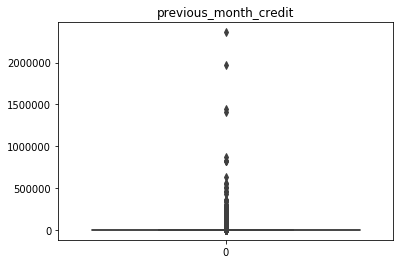

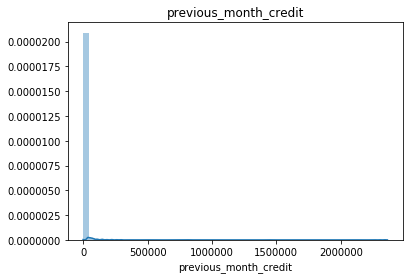

In [53]:
print("Skew = ",new_df[continuous_features[10]].skew())
sns.boxplot(data=new_df[continuous_features[10]])
plt.title(continuous_features[10])
plt.show()

sns.distplot(new_df[continuous_features[10]],bins=50)
plt.title(continuous_features[10])
plt.show()

## From the above data we can see  there are some values which are very large.we will consider that values as outliers.we will replace the values which  are >90 percentile with median value

Outlier= 5626.470000000025	Median= 6.44
After removing outlier skew is = 2.6784254809425043


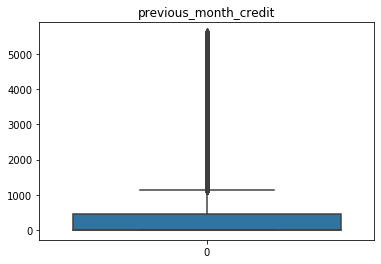

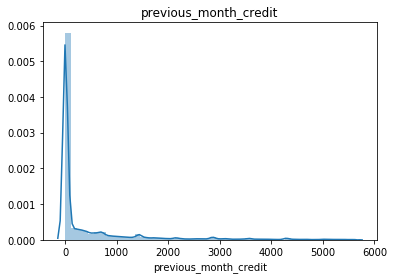

In [54]:
outlier=new_df[continuous_features[10]].quantile(0.90)
median=new_df[continuous_features[10]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[10]] = np.where(new_df[continuous_features[10]]>outlier,median,new_df[continuous_features[10]])
print(f'After removing outlier skew is = {new_df[continuous_features[10]].skew()}')
sns.boxplot(data=new_df[continuous_features[10]])
plt.title(continuous_features[10])
plt.show()

sns.distplot(new_df[continuous_features[10]],bins=50)
plt.title(continuous_features[10])
plt.show()

Skew =  110.22297022431452


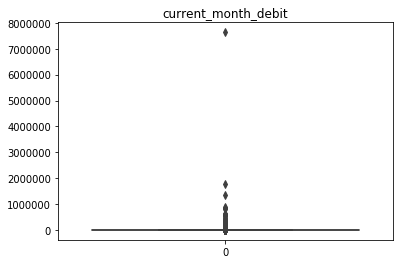

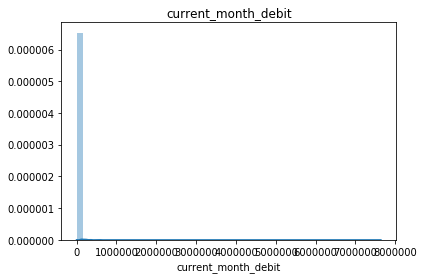

In [55]:
print("Skew = ",new_df[continuous_features[11]].skew())
sns.boxplot(data=new_df[continuous_features[11]])
plt.title(continuous_features[11])
plt.show()

sns.distplot(new_df[continuous_features[11]],bins=50)
plt.title(continuous_features[11])
plt.show()

## From the above data we can see  there are some values which are very large.we will consider that values as outliers.we will replace the values which  are >90 percentile with median value

Outlier= 6411.270000000008	Median= 214.73
After removing outlier skew is = 2.3840909570908386


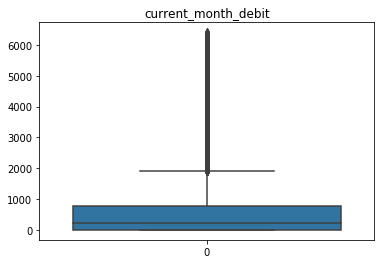

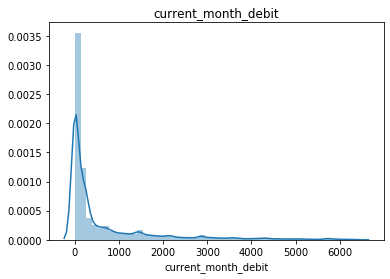

In [56]:
outlier=new_df[continuous_features[11]].quantile(0.90)
median=new_df[continuous_features[11]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[11]] = np.where(new_df[continuous_features[11]]>outlier,median,new_df[continuous_features[11]])
print(f'After removing outlier skew is = {new_df[continuous_features[11]].skew()}')
sns.boxplot(data=new_df[continuous_features[11]])
plt.title(continuous_features[11])
plt.show()

sns.distplot(new_df[continuous_features[11]],bins=50)
plt.title(continuous_features[11])
plt.show()

Skew =  30.282081620788823


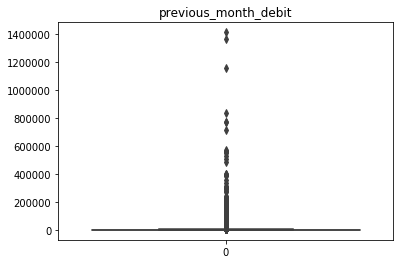

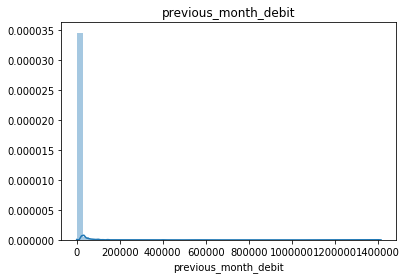

In [57]:
print("Skew = ",new_df[continuous_features[12]].skew())
sns.boxplot(data=new_df[continuous_features[12]])
plt.title(continuous_features[12])
plt.show()

sns.distplot(new_df[continuous_features[12]],bins=50)
plt.title(continuous_features[12])
plt.show()

In [58]:
new_df[continuous_features[13]].describe()

count    2.206700e+04
mean     7.165418e+03
std      1.959007e+04
min     -3.374180e+03
25%      2.029970e+03
50%      3.501740e+03
75%      6.858385e+03
max      1.074625e+06
Name: current_month_balance, dtype: float64

## From the above data we can see  there are some values which are very large.we will consider that values as outliers.we will replace the values which  are >90 percentile with median value

Outlier= 6605.114000000022	Median= 228.5
After removing outlier skew is = 2.3705925539261994


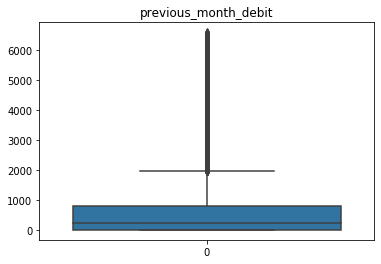

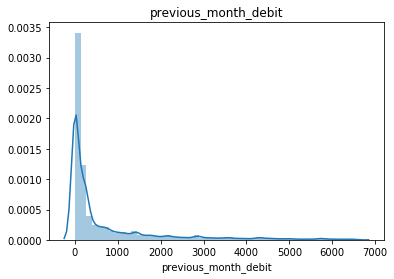

In [59]:
outlier=new_df[continuous_features[12]].quantile(0.90)
median=new_df[continuous_features[12]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[12]] = np.where(new_df[continuous_features[12]]>outlier,median,new_df[continuous_features[12]])
print(f'After removing outlier skew is = {new_df[continuous_features[12]].skew()}')
sns.boxplot(data=new_df[continuous_features[12]])
plt.title(continuous_features[12])
plt.show()

sns.distplot(new_df[continuous_features[12]],bins=50)
plt.title(continuous_features[12])
plt.show()

Skew =  24.332138584665458


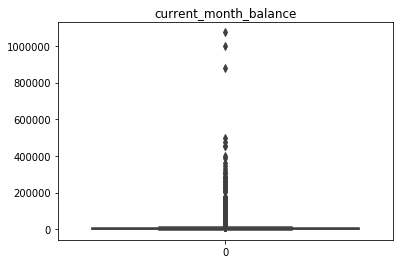

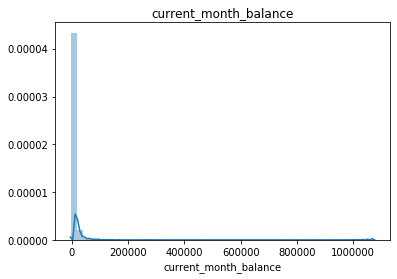

In [60]:
print("Skew = ",new_df[continuous_features[13]].skew())
sns.boxplot(data=new_df[continuous_features[13]])
plt.title(continuous_features[13])
plt.show()

sns.distplot(new_df[continuous_features[13]],bins=50)
plt.title(continuous_features[13])
plt.show()

## From the above data we can see there are some values which are <0 and there are some values which are very large.we will consider that values as outliers.we will replace the values which are <0 with 0 and the values which are >90 percentile with median value

Outlier= 13516.86	Median= 3501.74
After removing outlier skew is = 1.2903293509199874


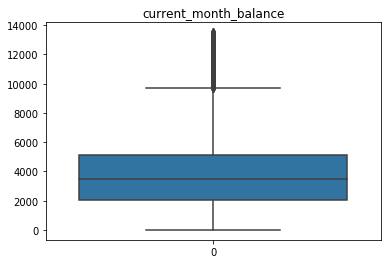

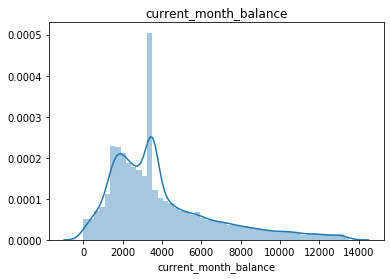

In [61]:
outlier=new_df[continuous_features[13]].quantile(0.90)
median=new_df[continuous_features[13]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[13]] = np.where(new_df[continuous_features[13]]<0,0,new_df[continuous_features[13]])
new_df[continuous_features[13]] = np.where(new_df[continuous_features[13]]>outlier,median,new_df[continuous_features[13]])
print(f'After removing outlier skew is = {new_df[continuous_features[13]].skew()}')
sns.boxplot(data=new_df[continuous_features[13]])
plt.title(continuous_features[13])
plt.show()

sns.distplot(new_df[continuous_features[13]],bins=50)
plt.title(continuous_features[13])
plt.show()

Skew =  28.77701598154453


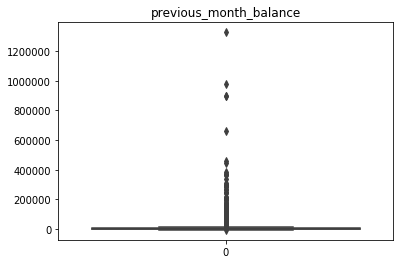

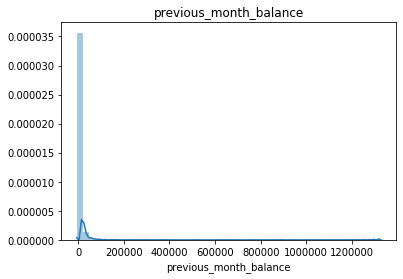

In [62]:
print("Skew = ",new_df[continuous_features[14]].skew())
sns.boxplot(data=new_df[continuous_features[14]])
plt.title(continuous_features[14])
plt.show()

sns.distplot(new_df[continuous_features[14]],bins=50)
plt.title(continuous_features[14])
plt.show()

## From the above data we can see there are some values which are <0 and there are some values which are very large.we will consider that values as outliers.we will replace the values which are <0 with 0 and the values which are >90 percentile with median value

Outlier= 13399.694000000003	Median= 3508.16
After removing outlier skew is = 1.3538653192603154


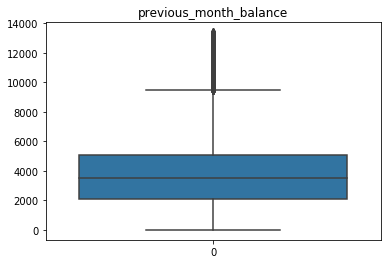

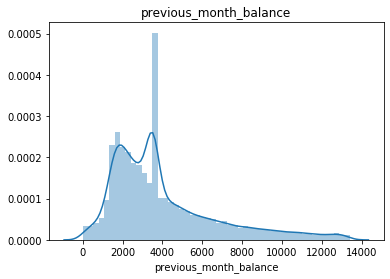

In [63]:
outlier=new_df[continuous_features[14]].quantile(0.90)
median=new_df[continuous_features[14]].quantile(0.50)
print(f'Outlier= {outlier}\tMedian= {median}')
new_df[continuous_features[14]] = np.where(new_df[continuous_features[14]]<0,0,new_df[continuous_features[14]])
new_df[continuous_features[14]] = np.where(new_df[continuous_features[14]]>outlier,median,new_df[continuous_features[14]])
print(f'After removing outlier skew is = {new_df[continuous_features[14]].skew()}')
sns.boxplot(data=new_df[continuous_features[14]])
plt.title(continuous_features[14])
plt.show()

sns.distplot(new_df[continuous_features[14]],bins=50)
plt.title(continuous_features[14])
plt.show()

In [64]:
new_df.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,x0_Male,x1_retired,x1_salaried,x1_self_employed,x1_student
0,3135.0,66,0.0,187.0,2,755,28.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,1.0,0.0,0.0,1.0,0.0
1,2531.0,42,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,1.0,0.0,0.0,1.0,0.0
2,263.0,42,0.0,1096.0,2,1666,60.0,3335.44,3426.74,3592.88,3380.69,0.36,0.36,857.50,286.07,3501.74,3508.16,0,0.0,0.0,0.0,1.0,0.0
3,2202.0,72,0.0,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,1.0,1.0,0.0,0.0,0.0
4,1145.0,46,0.0,623.0,2,317,28.0,10096.58,8519.53,6511.82,3380.69,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,1.0,0.0,0.0,1.0,0.0


In [65]:
new_df.describe()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,x0_Male,x1_retired,x1_salaried,x1_self_employed,x1_student
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000
mean,2184.913808,47.931345,0.377487,800.318575,2.211991,874.440975,29.907917,3819.997337,3910.939667,4144.626813,3782.304877,434.259003,493.669993,696.277258,726.005157,3988.505980,4022.491892,0.193683,0.608193,0.074228,0.253863,0.608782,0.062038
std,1149.789381,16.393352,1.044629,431.454448,0.669556,904.244526,26.117935,2897.050478,2839.821232,2600.227511,2725.916417,909.413732,1027.868606,1211.603032,1265.218278,2747.804654,2707.308766,0.395192,0.488165,0.262148,0.435230,0.488034,0.241231
min,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1428.690000,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1321.000000,36.000000,0.000000,409.000000,2.000000,159.000000,11.000000,1784.445000,1906.485000,2209.835000,1817.980000,0.360000,0.370000,0.470000,0.490000,2029.970000,2090.665000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2202.000000,46.000000,0.000000,848.000000,2.000000,531.000000,28.000000,3335.440000,3426.740000,3592.880000,3380.690000,1.130000,6.440000,214.730000,228.500000,3501.740000,3508.160000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2828.000000,60.000000,0.000000,1096.000000,3.000000,1374.000000,35.000000,4987.515000,5035.470000,5114.305000,4883.865000,386.170000,450.845000,763.210000,784.950000,5102.195000,5046.590000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,4989.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,115.000000,13967.500000,13778.700000,13265.170000,12889.880000,4909.430000,5619.690000,6409.110000,6599.030000,13516.660000,13398.730000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## checking is the dataset is balanced or imblanced ?

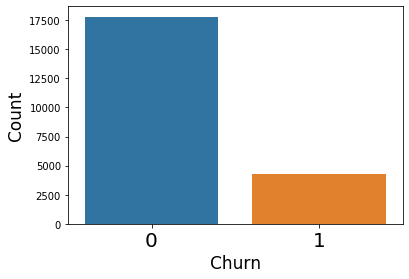

Total no of 0 is : 17793 and total no of 1 is : 4274


In [66]:
#Display class count
sns.countplot(x=new_df['churn'])
plt.xticks(size=20)
plt.xlabel('Churn',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()


print(f'Total no of 0 is : {new_df["churn"].value_counts()[0]} and total no of 1 is : {new_df["churn"].value_counts()[1]}')

## from the above count plot it is clear that the dataset is imblanced.To balanced the data set we will use two stretagy 1)Upsampling 2)Downsampling

In [67]:
models = []
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

# Checking accuracy with imblance dataset

In [68]:
y=new_df['churn']
X=new_df.drop(['churn'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
accuracy=[]
accuracy_prob=[]
for model in models:
    model[1].fit(X_train,y_train)
    prediction = model[1].predict(X_train)
    #acc_prob = model[1].predict_proba(X_train)
    #acc_prob = [p[1] for p in acc_prob]
    accuracy.append(accuracy_score(y_train,prediction))
    accuracy_prob.append(roc_auc_score(y_train,prediction))

In [70]:
for model,acc,roc_auc in zip(models,accuracy,accuracy_prob):
    print(f'Model name:{model[0]}\taccuracy is: {acc.round(3)}\troc_auc_score is:{roc_auc.round(3)}')

Model name:SVM	accuracy is: 0.847	roc_auc_score is:0.637
Model name:LR	accuracy is: 0.825	roc_auc_score is:0.579
Model name:KNN	accuracy is: 0.87	roc_auc_score is:0.713
Model name:DTC	accuracy is: 1.0	roc_auc_score is:1.0
Model name:RF	accuracy is: 1.0	roc_auc_score is:1.0
Model name:NB	accuracy is: 0.781	roc_auc_score is:0.575


## It is clear that roc_auc_score of models are very low than accuracy of model.Let's see after performing upsampling and downsampling the accuracy and roc_auc_score of models

# Upsampling minority class

In [71]:
# seperating minority and majority class
df_minority = new_df[new_df['churn']==1]
df_majority = new_df[new_df['churn']==0]

#upsampling minority class
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = len(df_majority),
                                random_state=123)

#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority,df_minority_upsampled])


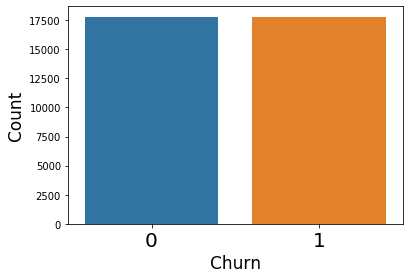

Total no of 0 is : 17793 and total no of 1 is : 17793


In [72]:
#Display new class count
sns.countplot(x=df_upsampled['churn'])
plt.xticks(size=20)
plt.xlabel('Churn',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

print(f'Total no of 0 is : {df_upsampled["churn"].value_counts()[0]} and total no of 1 is : {df_upsampled["churn"].value_counts()[1]}')

In [73]:
y=df_upsampled['churn']
X=df_upsampled.drop(['churn'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
models = []
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

In [75]:
accuracy=[]
accuracy_prob=[]
for model in models:
    model[1].fit(X_train,y_train)
    prediction = model[1].predict(X_train)
    #acc_prob = model[1].predict_proba(X_train)
    #acc_prob = [p[1] for p in acc_prob]
    accuracy.append(accuracy_score(y_train,prediction))
    accuracy_prob.append(roc_auc_score(y_train,prediction))

In [76]:
for model,acc,roc_auc in zip(models,accuracy,accuracy_prob):
    print(f'Model name:{model[0]}\taccuracy is: {acc.round(3)}\troc_auc_score is:{roc_auc.round(3)}')

Model name:SVM	accuracy is: 0.762	roc_auc_score is:0.762
Model name:LR	accuracy is: 0.718	roc_auc_score is:0.718
Model name:KNN	accuracy is: 0.866	roc_auc_score is:0.866
Model name:DTC	accuracy is: 1.0	roc_auc_score is:1.0
Model name:RF	accuracy is: 1.0	roc_auc_score is:1.0
Model name:NB	accuracy is: 0.657	roc_auc_score is:0.657


# Downsampling majority class

In [77]:
# seperating minority and majority class
df_minority = new_df[new_df['churn']==1]
df_majority = new_df[new_df['churn']==0]

#upsampling minority class
df_majority_downsampled = resample(df_majority,
                                replace = True,
                                n_samples = len(df_minority),
                                random_state=123)

#combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority,df_majority_downsampled])


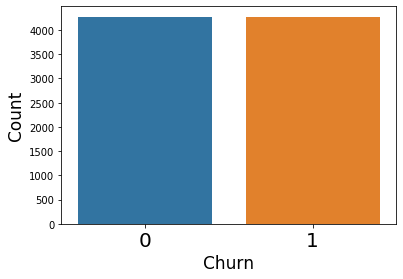

Total no of 0 is : 4274 and total no of 1 is : 4274


In [78]:
#Display new class count
sns.countplot(x=df_downsampled['churn'])
plt.xticks(size=20)
plt.xlabel('Churn',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

print(f'Total no of 0 is : {df_downsampled["churn"].value_counts()[0]} and total no of 1 is : {df_downsampled["churn"].value_counts()[1]}')

In [79]:
y=df_downsampled['churn']
X=df_downsampled.drop(['churn'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
accuracy=[]
accuracy_prob=[]
for model in models:
    model[1].fit(X_train,y_train)
    prediction = model[1].predict(X_train)
    #acc_prob = model[1].predict_proba(X_train)
    #acc_prob = [p[1] for p in acc_prob]
    accuracy.append(accuracy_score(y_train,prediction))
    accuracy_prob.append(roc_auc_score(y_train,prediction))

In [81]:
for model,acc,roc_auc in zip(models,accuracy,accuracy_prob):
    print(f'Model name:{model[0]}\taccuracy is: {acc.round(3)}\troc_auc_score is:{roc_auc.round(3)}')

Model name:SVM	accuracy is: 0.752	roc_auc_score is:0.752
Model name:LR	accuracy is: 0.719	roc_auc_score is:0.718
Model name:KNN	accuracy is: 0.793	roc_auc_score is:0.793
Model name:DTC	accuracy is: 1.0	roc_auc_score is:1.0
Model name:RF	accuracy is: 1.0	roc_auc_score is:1.0
Model name:NB	accuracy is: 0.655	roc_auc_score is:0.655


## after performing upsampling and downsampling we can see that upsampeling gives better roc_auc_score in all the models than downsample

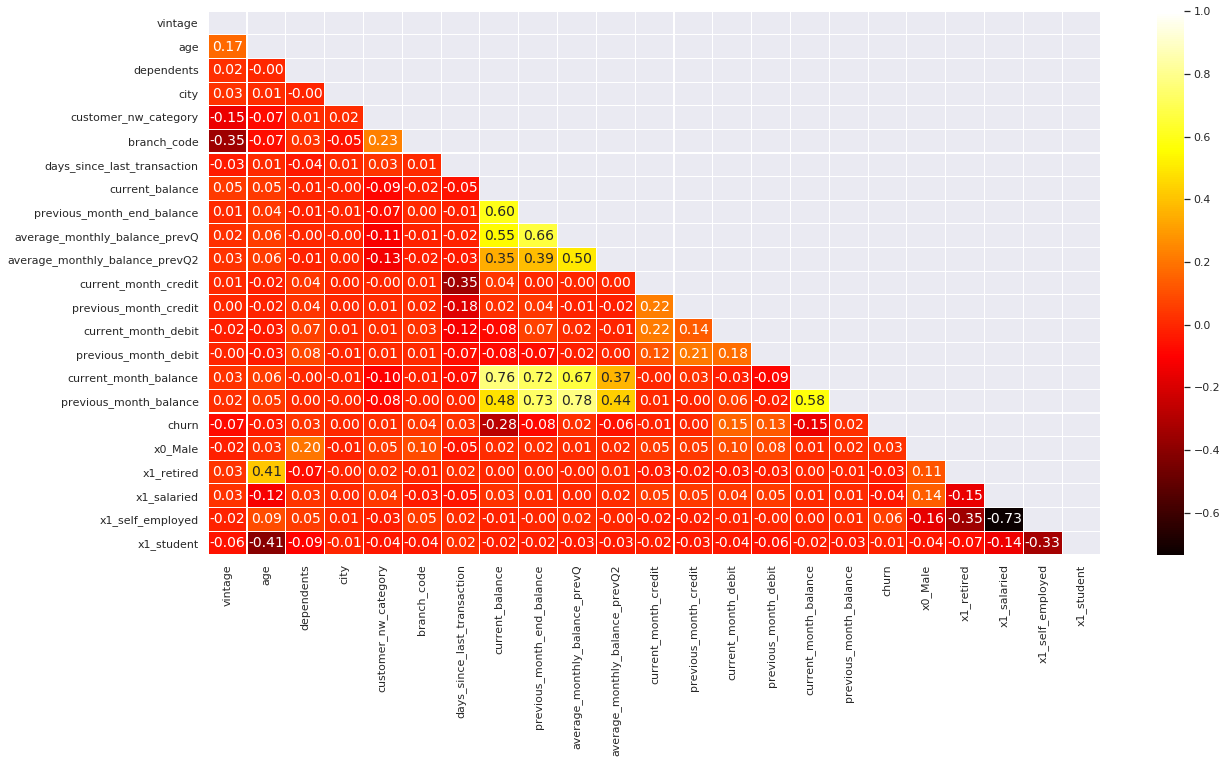

In [142]:
plt.figure(figsize=(20,10))
matrix = np.triu(df_upsampled.corr())
sns.heatmap(df_upsampled.corr(), annot=True, mask=matrix,cmap='hot',fmt='.2f',linewidths=0.1,annot_kws={"size": 14})
plt.show()